In [ ]:
# ======================================
# Sentiment Analysis using TF-IDF + Logistic Regression
# Assignment No. 5 (Group B - NLP)
# ======================================

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Step 2: Load Dataset
# We'll use a public IMDB review dataset from Keras
from tensorflow.keras.datasets import imdb

# Load the dataset with top 10,000 most frequent words
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 3: Decode reviews (convert integers back to words)
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(text):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in text])

X_train_text = [decode_review(x) for x in X_train]
X_test_text = [decode_review(x) for x in X_test]


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 4: Text Preprocessing Function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)          # remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)     # keep only alphabets
    text = text.lower()                        # lowercase
    text = text.split()
    text = [w for w in text if w not in stopwords.words('english')]
    return " ".join(text)

In [ ]:
# Clean a small portion for demo (you can clean all for full accuracy)
X_train_clean = [clean_text(t) for t in X_train_text[:5000]]
X_test_clean = [clean_text(t) for t in X_test_text[:1000]]
y_train_small = y_train[:5000]
y_test_small = y_test[:1000]

In [ ]:
# Step 5: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_clean)
X_test_tfidf = vectorizer.transform(X_test_clean)


In [ ]:
# Step 6: Train Sentiment Classification Model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train_small)


LogisticRegression(max_iter=200)

In [ ]:
# Step 7: Evaluate Model
y_pred = model.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test_small, y_pred))
print("\nClassification Report:\n", classification_report(y_test_small, y_pred))



✅ Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       526
           1       0.82      0.88      0.85       474

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



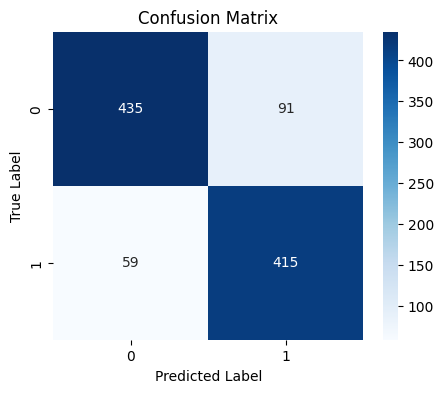

In [ ]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Step 9: Test with your own example
test_review = "This movie was very bad, I don't loved the storyline!"
clean_review = clean_text(test_review)
tfidf_review = vectorizer.transform([clean_review])
prediction = model.predict(tfidf_review)[0]

if prediction == 1:
    print("🟢 Sentiment: Positive")
else:
    print("🔴 Sentiment: Negative")

🔴 Sentiment: Negative
